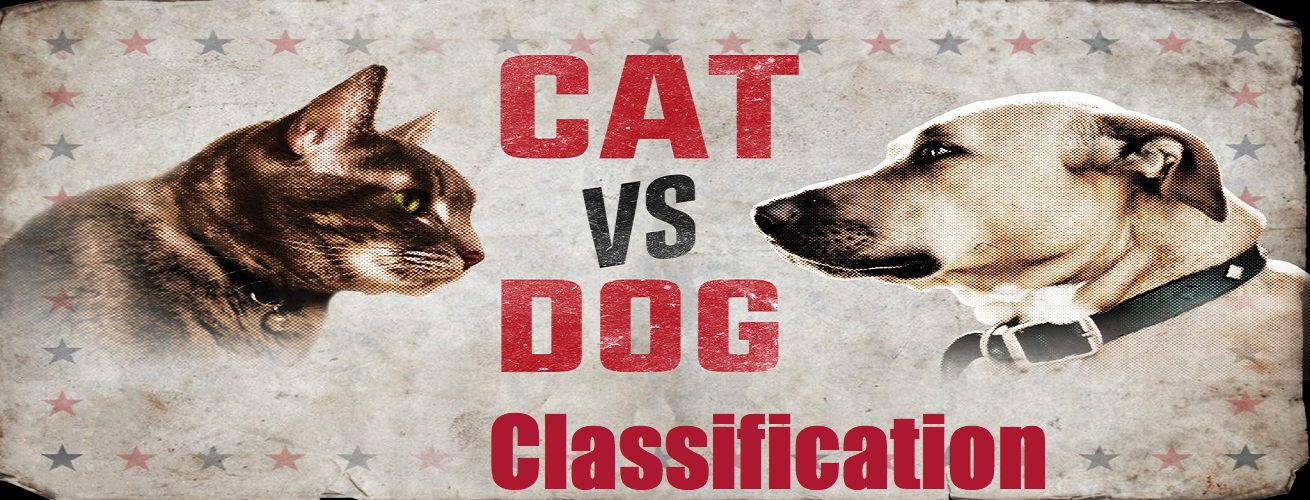

### Import required library

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

### Image Preprocesing

In [12]:
train_datagen=ImageDataGenerator(
    rescale=1./255, # all pixel between 0-1
    shear_range=0.2, # 
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

### Load training and Testing Data from local machine

Test Dataset link=[https://drive.google.com/drive/folders/1qhjT3-_1ESPEZJxbpQoAxUIwqsZOdvQa?usp=sharing]

Train dataset link=[https://drive.google.com/drive/folders/1q7siNvKcHHpl9XXZZgCzzZYx42_DOHSK?usp=share_link]

Sample image-1 link=[https://drive.google.com/file/d/1Qie8QPATttffIEYnUxBoW7A9eWnhYu0Y/view?usp=share_link]

Sample image-2 link=[https://drive.google.com/file/d/1qJLXmqHKWr8OPYjtXvx6sszsiC8f9wr8/view?usp=sharing]

In [19]:
train_set=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/CNN/train',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [20]:
test_set=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/CNN/test',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

Found 10 images belonging to 2 classes.


### Check the Class

In [36]:
test_set.class_indices

{'cat': 0, 'dog': 1}

### Plot some random images in train set

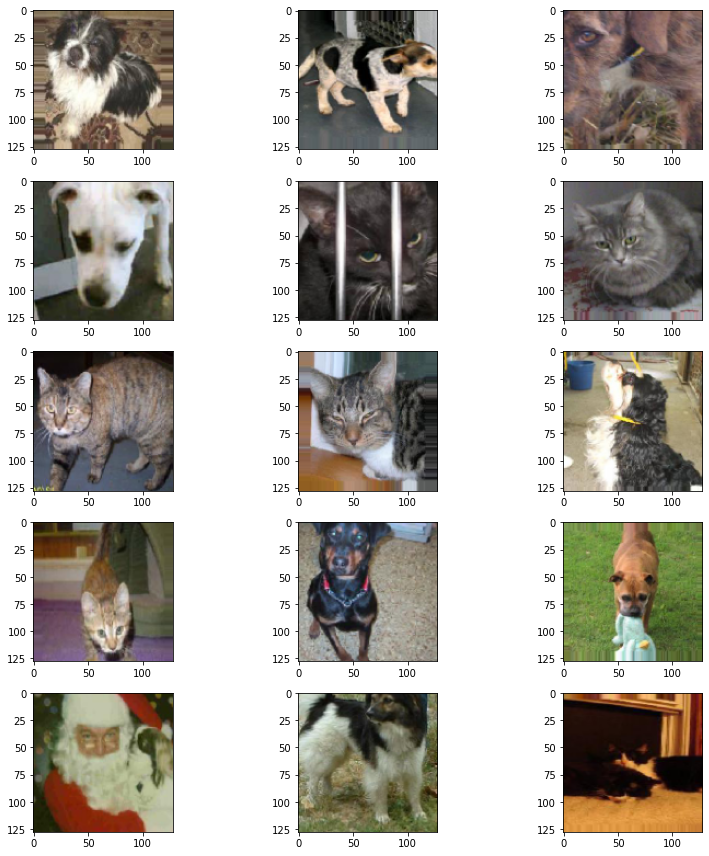

In [22]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3, i+1)
    for X, Y in train_set:
        image=X[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [23]:
X.shape

(32, 128, 128, 3)

### Convolution model

In [24]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.models import Sequential

In [26]:
model=Sequential()

#convolution layer 1, maxpooling 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128 ,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#convolution layer 2, maxpooling 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#convolution layer 3, maxpooling 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#flatten layer
model.add(Flatten())

#ANN or dense layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#output layer
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)      

In [28]:
#compile layer
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
#train the model
hist=model.fit(train_set, epochs=30, batch_size=32, validation_data=test_set)

Epoch 1/30
63/63 [==============================] - 408s 7s/step - loss: 1.0616 - accuracy: 0.5700 - val_loss: 2.1169 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 66s 1s/step - loss: 0.7531 - accuracy: 0.6340 - val_loss: 1.8935 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 65s 1s/step - loss: 0.7225 - accuracy: 0.6410 - val_loss: 1.6726 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 65s 1s/step - loss: 0.6522 - accuracy: 0.6775 - val_loss: 1.1738 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 66s 1s/step - loss: 0.6001 - accuracy: 0.6910 - val_loss: 2.1783 - val_accuracy: 0.5000
Epoch 6/30
63/63 [==============================] - 65s 1s/step - loss: 0.5963 - accuracy: 0.7110 - val_loss: 1.6176 - val_accuracy: 0.5000
Epoch 7/30
63/63 [==============================] - 65s 1s/step - loss: 0.5523 - accuracy: 0.7305 - val_loss: 0.8384 - val_accuracy: 0.6000
Epoch 8/30
63/63 [=

#### Highest training Accuracy is 92.4% and Test accuracy is 90%.

### Predict the Image class for Unseen image

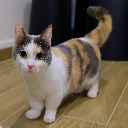

In [37]:
from tensorflow.keras.utils import load_img
new_image=load_img(r"/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/CNN/cat.jpg",
                   target_size=(128,128))
new_image

In [38]:
#convert image to array
from tensorflow.keras.utils import img_to_array
new_image=img_to_array(new_image)
print("Shape before:", new_image.shape)

#change the shape as per requirement
new_image0=np.expand_dims(new_image,axis=0)
print("Shape after:", new_image0.shape)

#predict
result=model.predict(new_image0)
if result[[0]]<=0:
    print("It is  Cat")
else:
    print("It is dog")

Shape before: (128, 128, 3)
Shape after: (1, 128, 128, 3)
1/1 [==============================] - 0s 27ms/step
It is  Cat


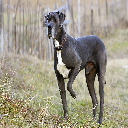

In [39]:
new_image=load_img(r"/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/CNN/dog.jpg",
                   target_size=(128,128))
new_image

In [40]:
#convert image to array
new_image=img_to_array(new_image)
print("Shape before:", new_image.shape)

#change the shape as per requirement
new_image0=np.expand_dims(new_image,axis=0)
print("Shape after:", new_image0.shape)

#predict
result=model.predict(new_image0)
if result[[0]]<=0.5:
    print("Image is of Cat")
else:
    print("Image is of dog")

Shape before: (128, 128, 3)
Shape after: (1, 128, 128, 3)
1/1 [==============================] - 0s 28ms/step
Image is of dog
